In [342]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from pymongo.collection import Collection
from database.database import user_collection


In [336]:

class Expenses:
    utilities = 0
    entertainment = 0
    school_fees = 0
    shopping = 0
    healthcare = 0


# Create a Python or R class named "User
class User:
    def __init__(self):
        self.first_name:str = "" 
        self.last_name:str = ""
        self.age:int = 0
        self.gender:str = ""
        self.user_id:str = ""
        self.total_income:int = 0
        self.expenses:Expenses = Expenses()

In [337]:
# Query the database to retrieve users information
user_collection:Collection = user_collection
users_demography = user_collection.find({})

In [338]:
# Initialize a list structure to store the user data object
user_list:List[User] = []

# Extract data from the users_demography cursor
for documents in users_demography:
    users_data = User()
    users_data.first_name = documents["first_name"]
    users_data.last_name = documents["last_name"]
    users_data.age = documents["age"]
    users_data.gender = documents["gender"]
    users_data.user_id = documents["user_id"]
    users_data.total_income = documents["total_income"]
    
    # Extract the Expenses categories
    users_data.expenses.utilities = documents["expense"].get("utilities", 0)
    users_data.expenses.entertainment = documents["expense"].get("entertainment", 0)
    users_data.expenses.school_fees = documents["expense"].get("school_fees", 0)
    users_data.expenses.shopping = documents["expense"].get("shopping", 0)
    users_data.expenses.healthcare = documents["expense"].get("healthcare", 0)

    # Append the user data object to the list
    user_list.append(users_data)
    
    

In [339]:
# Structure the the User object to form a proper dictionary
users_profile_list = []
for user_profile in user_list:

    user_info = {
        "first_name":user_profile.first_name,
        "last_name":user_profile.last_name,
        "age":user_profile.age,
        "gender":user_profile.gender,
        "user_id":user_profile.user_id,
        "total_income":user_profile.total_income,
        "utilities":user_profile.expenses.utilities,
        "entertainment":user_profile.expenses.entertainment,
        "school_fees":user_profile.expenses.school_fees,
        "shopping":user_profile.expenses.shopping,
        "healthcare":user_profile.expenses.healthcare
    }
    users_profile_list.append(user_info)


In [340]:
# Import users data into pandas dataframe
df = pd.DataFrame(data=users_profile_list)

In [341]:
df

,first_name,last_name,age,gender,user_id,total_income,utilities,entertainment,school_fees,shopping,healthcare
0,Ogechi,Ezeobi,38,Female,2,25000,500,1000,2000,5000,8000
1,Kachi,Ezeobi,38,Female,2,25000,500,1000,2000,5000,8000
2,Munachi,Ezeobi,25,Female,2,70000,45,45,0,0,0
3,Samuel,Uzochukwu,32,Male,2,500000,50000,70000,40000,80000,25000


In [ ]:
# Show the ages with the highest income.
# Show the gender distribution across spending categories#
# Export the charts for use in a PowerPoint presentation for client use.

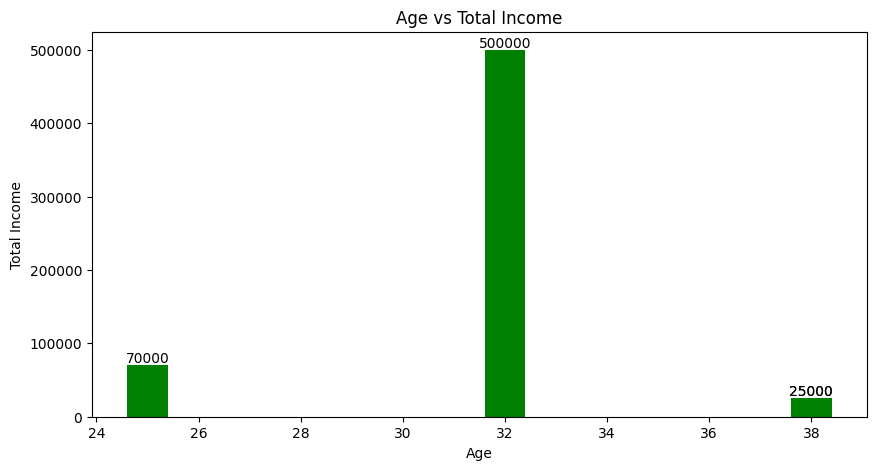

In [348]:
# Plot 1: Ages with the highest total income
plt.figure(figsize=(10, 5))
bars = plt.bar(df['age'], df['total_income'], color='green')
plt.title('Age vs Total Income')
plt.xlabel('Age')
plt.ylabel('Total Income')

# Add data labels for total income
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.savefig('/mnt/data/age_vs_total_income.png', dpi=300, bbox_inches='tight')
plt.show()


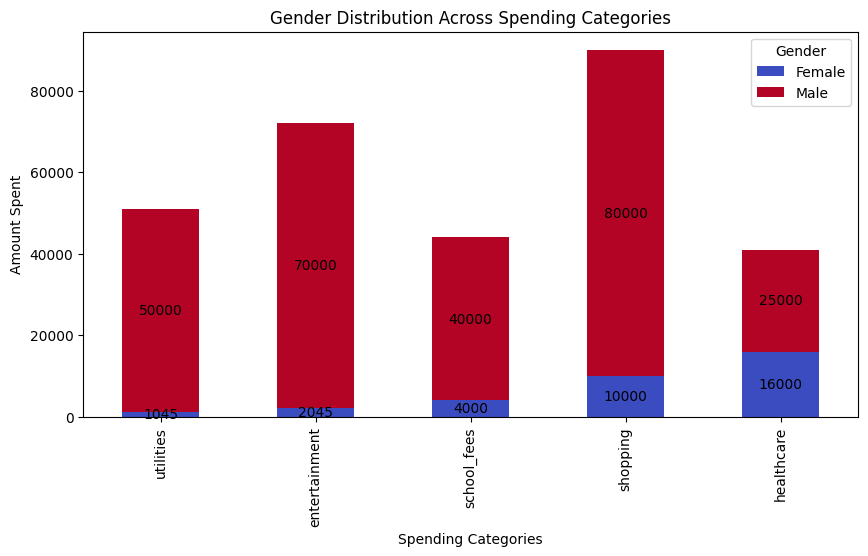

In [357]:
spending_categories = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']

# Group by gender and sum spending categories
gender_spending = df.groupby('gender')[spending_categories].sum()

# Plot stacked bar for gender spending distribution
ax = gender_spending.T.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title('Gender Distribution Across Spending Categories')
plt.xlabel('Spending Categories')
plt.ylabel('Amount Spent')
plt.legend(title='Gender')

# Add data labels for each stacked bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.savefig('/mnt/data/gender_spending_distribution.png', dpi=300, bbox_inches='tight')
plt.show()